# Assignment 4: Face Detection and Recognition

## DTSC-680: Applied Machine Learning

## Name:

The `data` directory contains three folders 30 face images of three players from the 2024 Philadelphia Phillies: Alec Bohm, Bryson Stott, and Brandon Marsh. The original images were downloaded from Google Images and the face images were extraced using the `extract_faces` function from the textbook. In addition, the `Samples` directory contains three images of a combination of those players.

Your task is to create a system that can correctly detect and identify Bohm, Stott, and Marsh in those three sample images.

### Install Tensorflow 2.9.2

In [4]:
# CODE PROVIDED
import subprocess
import sys
from IPython.display import clear_output
def check_tensorflow():
    tf_desired_version = "2.9.2"

    try:
        import tensorflow as tf
        tf_installed_version = tf.__version__
    except ImportError:
        tf_installed_version = None

    #Check for the right version
    if tf_installed_version != tf_desired_version:
        print(f"Current TensorFlow version: {tf_installed_version}. Installing version {tf_desired_version}...")
        
        # Uninstall the current TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', 'tensorflow'])
        
        # Install the desired TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', f'tensorflow=={tf_desired_version}'])

        clear_output()
        
        print(f"TensorFlow version {tf_desired_version} installed successfully. Please restart your kernel to apply the changes.")
    else:
        print(f"TensorFlow version {tf_desired_version} is already installed.")    

check_tensorflow()

TensorFlow version 2.9.2 is already installed.


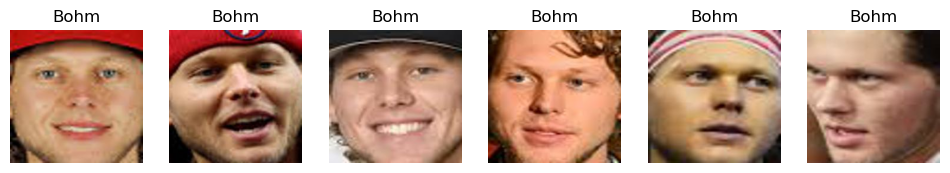

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

#LoadING images
def load_player_images(folder_path, label):
    images, labels = [], []
    for file in os.listdir(folder_path):
        if not file.startswith('.') and file.lower().endswith(('jpg', 'jpeg', 'png')):
            img = image.load_img(os.path.join(folder_path, file), target_size=(224, 224, 3))
            images.append(image.img_to_array(img))
            labels.append(label)
    return images, labels

players = ['Bohm', 'Stott', 'Marsh']
X, y = [], []
for idx, player in enumerate(players):
    folder = f"data/{player}"
    imgs, lbls = load_player_images(folder, idx)
    X += imgs
    y += lbls

X = np.array(X)
y = np.array(y)

plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(X[i].astype('uint8'))
    plt.axis('off')
    plt.title(players[y[i]])
plt.show()

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input


from mtcnn.mtcnn import MTCNN

%matplotlib inline

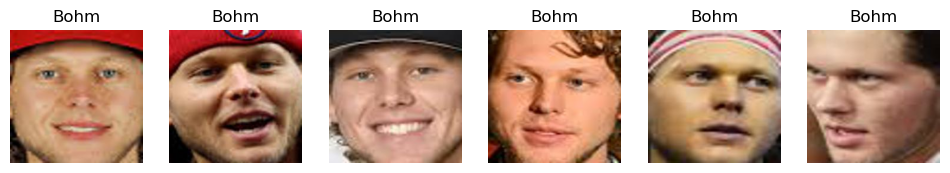

In [7]:
def load_player_images(folder_path, label):
    images, labels = [], []
    for file in os.listdir(folder_path):
        if not file.startswith('.') and file.lower().endswith(('jpg', 'jpeg', 'png')):
            img = image.load_img(os.path.join(folder_path, file), target_size=(224, 224, 3))
            images.append(image.img_to_array(img))
            labels.append(label)
    return images, labels


X, y = [], []
players = ['Bohm', 'Stott', 'Marsh']
for idx, player in enumerate(players):
    folder = f"data/{player}"
    imgs, lbls = load_player_images(folder, idx)
    X += imgs
    y += lbls

X = np.array(X)
y = np.array(y)


plt.figure(figsize=(12,4))
for i in range(min(6, len(X))):
    plt.subplot(1,6,i+1)
    plt.imshow(X[i].astype('uint8'))
    plt.axis('off')
    plt.title(players[y[i]])
plt.show()

In [8]:

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))
X_proc = preprocess_input(X) / 255.0
features = base_model.predict(X_proc)
features = features.reshape(features.shape[0], -1)

print("Extracted Features Shape:", features.shape)

1/1 [==============================] - 2s 2s/step
Extracted Features Shape: (30, 100352)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, y, test_size=0.2, stratify=y, random_state=42)

clf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = clf.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=12, batch_size=8)

Epoch 1/12
3/3 [==============================] - 1s 112ms/step - loss: 9.7948 - accuracy: 0.3333 - val_loss: 15.5111 - val_accuracy: 0.5000
Epoch 2/12
3/3 [==============================] - 0s 51ms/step - loss: 4.8686 - accuracy: 0.7083 - val_loss: 4.1517 - val_accuracy: 0.8333
Epoch 3/12
3/3 [==============================] - 0s 51ms/step - loss: 0.9438 - accuracy: 0.9167 - val_loss: 17.3803 - val_accuracy: 0.5000
Epoch 4/12
3/3 [==============================] - 0s 51ms/step - loss: 0.3029 - accuracy: 0.9583 - val_loss: 16.2304 - val_accuracy: 0.6667
Epoch 5/12
3/3 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 15.3522 - val_accuracy: 0.6667
Epoch 6/12
3/3 [==============================] - 0s 50ms/step - loss: 0.4090 - accuracy: 0.9583 - val_loss: 15.7581 - val_accuracy: 0.6667
Epoch 7/12
3/3 [==============================] - 0s 50ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 16.1789 - val_accuracy: 0.6667
Epoch 8/12
3/3 [

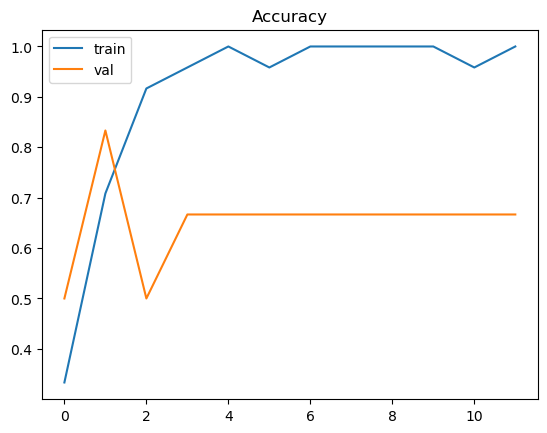

1/1 [==============================] - 0s 41ms/step


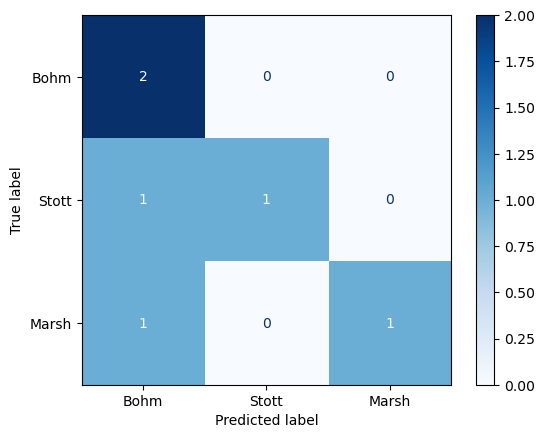

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()
plt.show()

y_pred = np.argmax(clf.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=players)
disp.plot(cmap='Blues')
plt.show()

In [11]:
def get_face(np_image, face):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    return np_image[y:y+h, x:x+w]

def detect_and_identify_faces(img_path, detector, base_model, clf, players):
    img = image.load_img(img_path)
    img_rgb = np.array(img)
    detections = detector.detect_faces(img_rgb)
    plt.imshow(img_rgb)
    ax = plt.gca()
    for det in detections:
        x, y, w, h = det['box']
        face = get_face(img_rgb, det)
        try:
            face_img = image.array_to_img(face).resize((224,224))
            arr = image.img_to_array(face_img)
            arr = preprocess_input(arr) / 255.0
            arr = np.expand_dims(arr, axis=0)
            features = base_model.predict(arr)
            features = features.reshape(1, -1)
            pred = np.argmax(clf.predict(features), axis=1)[0]
            label = players[pred]
        except Exception as e:
            label = "Error"
        rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        plt.text(x, y-10, label, color='red', fontsize=12, weight='bold')
    plt.axis('off')
    plt.show()

Processing sample-1.jpeg:
1/1 [==============================] - 0s 19ms/step


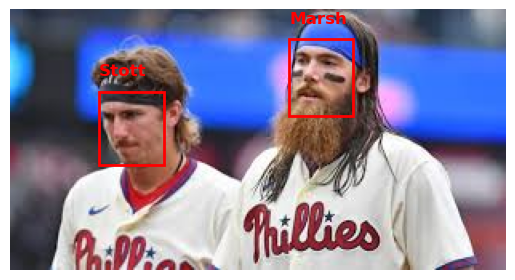

Processing sample-2.jpeg:
1/1 [==============================] - 0s 20ms/step


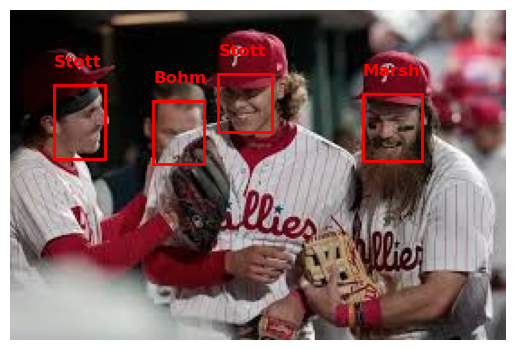

Processing sample-3.jpeg:
1/1 [==============================] - 0s 21ms/step


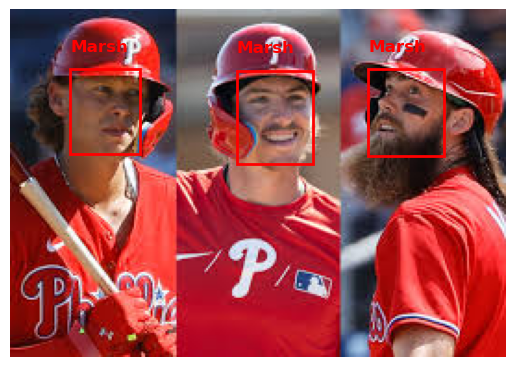

In [12]:
detector = MTCNN()
sample_dir = 'data/Samples'
for file in os.listdir(sample_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"Processing {file}:")
        detect_and_identify_faces(os.path.join(sample_dir, file), detector, base_model, clf, players)

## Codegrade Validation

### Execute the cells below to generate the file required for submission to Codegrade. DO NOT CHANGE THE CODE.

In [14]:
# CODE PROVIDED
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.applications.resnet50 import preprocess_input


def make_pred(path, model, names, face_threshold=0.9, prediction_threshold=0.9, show_outline=True, size=(12, 8)):
    # Load the image and orient it correctly
    pil_image = Image.open(path)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
            
    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']

        # Use the model to identify the face
        face_image = get_face(np_image, face)
        face_image = image.array_to_img(face_image)
        face_image = preprocess_input(np.array(face_image))
        predictions = model.predict(np.expand_dims(face_image, axis=0))
        confidence = np.max(predictions)

        if (confidence > prediction_threshold):
            return predictions
            

        return None
        
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def get_all_images_from_directory(directory):
    images = []
    labels = []
    images_names = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            images_names += [img for img in os.listdir(label_path)]
            images += [os.path.join(label_path, img) for img in os.listdir(label_path)]
            labels += [int(label)] * len(os.listdir(label_path))
    
    # Embaralhar as imagens e labels
    combined = list(zip(images_names, images, labels))
    random.shuffle(combined)
    images_names, images, labels = zip(*combined)
    
    #return images_names, images, labels
    return zip(*combined)

def predict_and_validate(model, image_names, image_paths, true_labels, class_labels):
    predictions = []
    for img_path in image_paths:
        predictions.append(make_pred(img_path, model, class_labels, prediction_threshold=0.8))
    
    results = [true == pred for true, pred in zip(true_labels, predictions)]
    
    df = pd.DataFrame({
        'Player': image_names,
        'Prediction Array': predictions
    })
    
    return df

In [15]:
def make_pred(path, model, names, face_threshold=0.9, prediction_threshold=0.9, show_outline=True, size=(12, 8)):
    pil_image = Image.open(path)
    exif = pil_image.getexif()
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']
        face_image = get_face(np_image, face)
        face_image = image.array_to_img(face_image).resize((224,224))
        face_image = np.array(face_image)
        face_image = preprocess_input(face_image) / 255.0
        face_image = np.expand_dims(face_image, axis=0)
        features = base_model.predict(face_image)
        features = features.reshape(1, -1)
        predictions = model.predict(features)
        confidence = np.max(predictions)
        if (confidence > prediction_threshold):
            return int(np.argmax(predictions)) 
    return None  

In [16]:
def get_face(np_image, face):
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)
    return np_image[y:y+h, x:x+w]

In [17]:
from IPython.display import clear_output

model_to_evaluate = clf

class_labels = {0: 'Alec Bohm', 1: 'Bryson Stott', 2: 'Brandon Marsh'} 
image_names, image_paths, true_labels = get_all_images_from_directory('data/codegrade_test/')
prediction_df = predict_and_validate(model_to_evaluate, image_names, image_paths, true_labels, class_labels)
clear_output()
prediction_df

,Player,Prediction Array
0,alec_04.jpg,2
1,Bryson_04.png,1
2,alec_06.jpg,0
3,Bryson_09.png,1
4,Bryson_06.png,1
5,alec_01.jpg,0
6,Brandon_07.png,2
7,alec_02.jpg,0
8,alec_07.jpg,1
9,alec_05.jpg,0


### Export Prediction Array for Codegrade evaluation


In [19]:
# CODE PROVIDED
import pandas as pd

#export your classification model
prediction_df.to_pickle('prediction_df')